In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder


df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
summary_stats = df.describe(include='all')

display(summary_stats)
print(df.info())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [15]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include=['object'])
print('numarical data :',numerical_data)
print('chatagorical data :',categorical_data)

numarical data :        age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]
chatagorical data :  

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check for missing values again
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [17]:

# Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
df_minmax = pd.DataFrame(scaled_data, columns=numerical_columns)

# Print the updated DataFrame
display(df_scaled.head())
display(df_minmax.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [18]:

for col in categorical_columns:
    if df[col].nunique() < 5:
        df_dummies = pd.get_dummies(df[col], prefix=col)
        df_ohe = pd.concat([df, df_dummies], axis=1)
        df.drop(col, axis=1)

# Print the updated DataFrame
display(df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df_le = pd.DataFrame(columns=categorical_columns)
for col in categorical_columns:
    if df[col].nunique() > 5:
        le = LabelEncoder()
        df_le[col] = le.fit_transform(df[col])

# Print the updated DataFrame
display(df.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


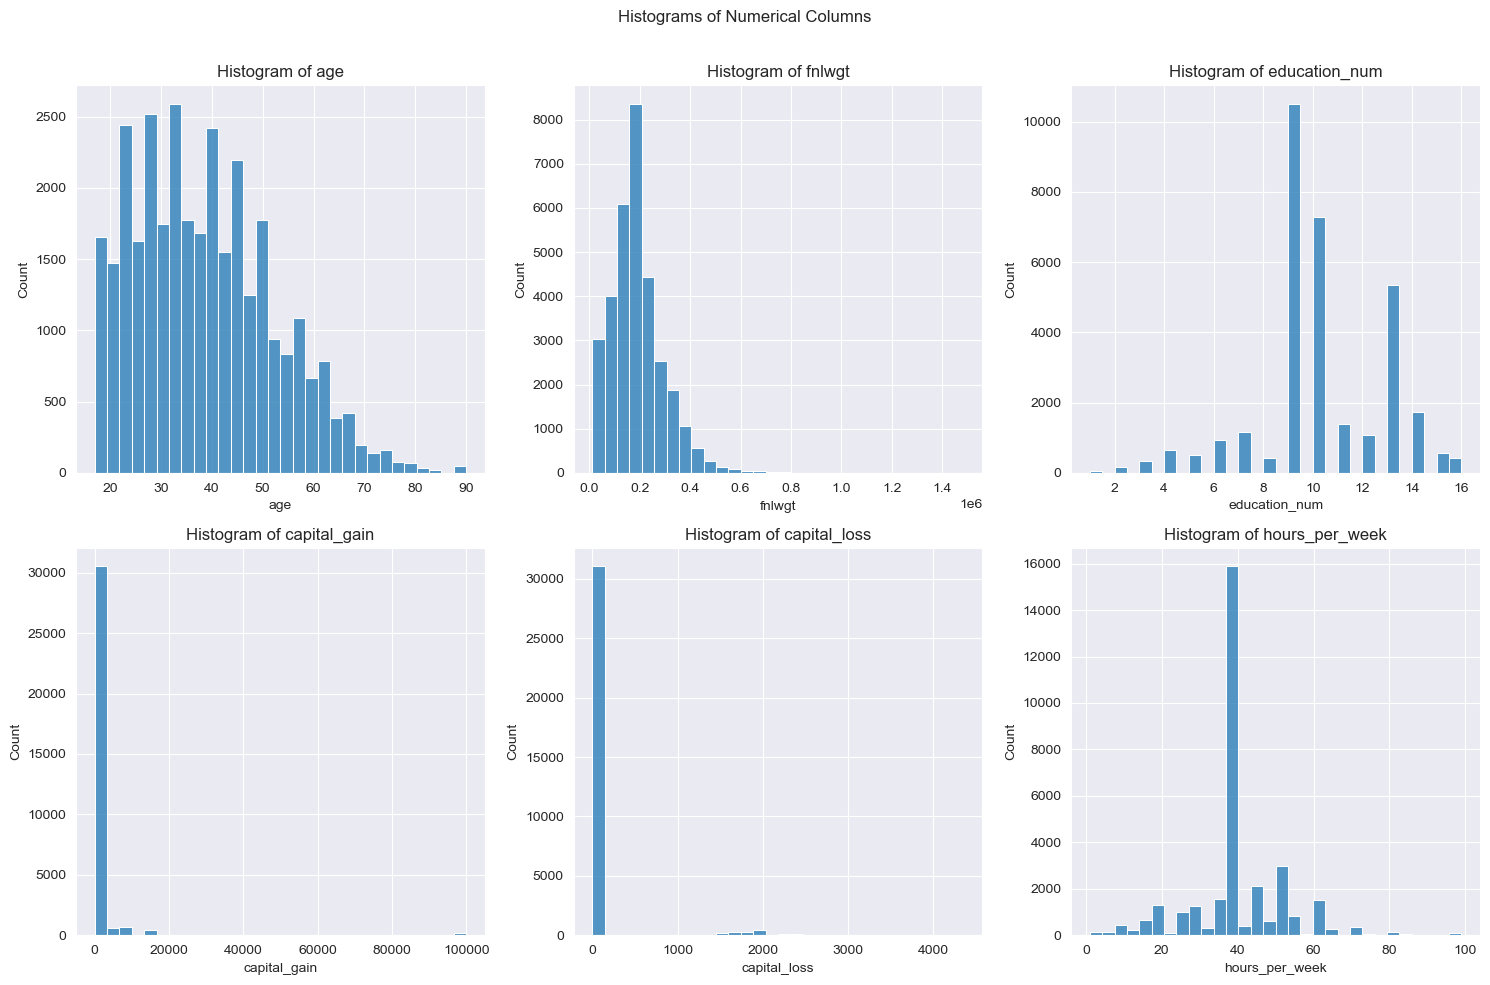

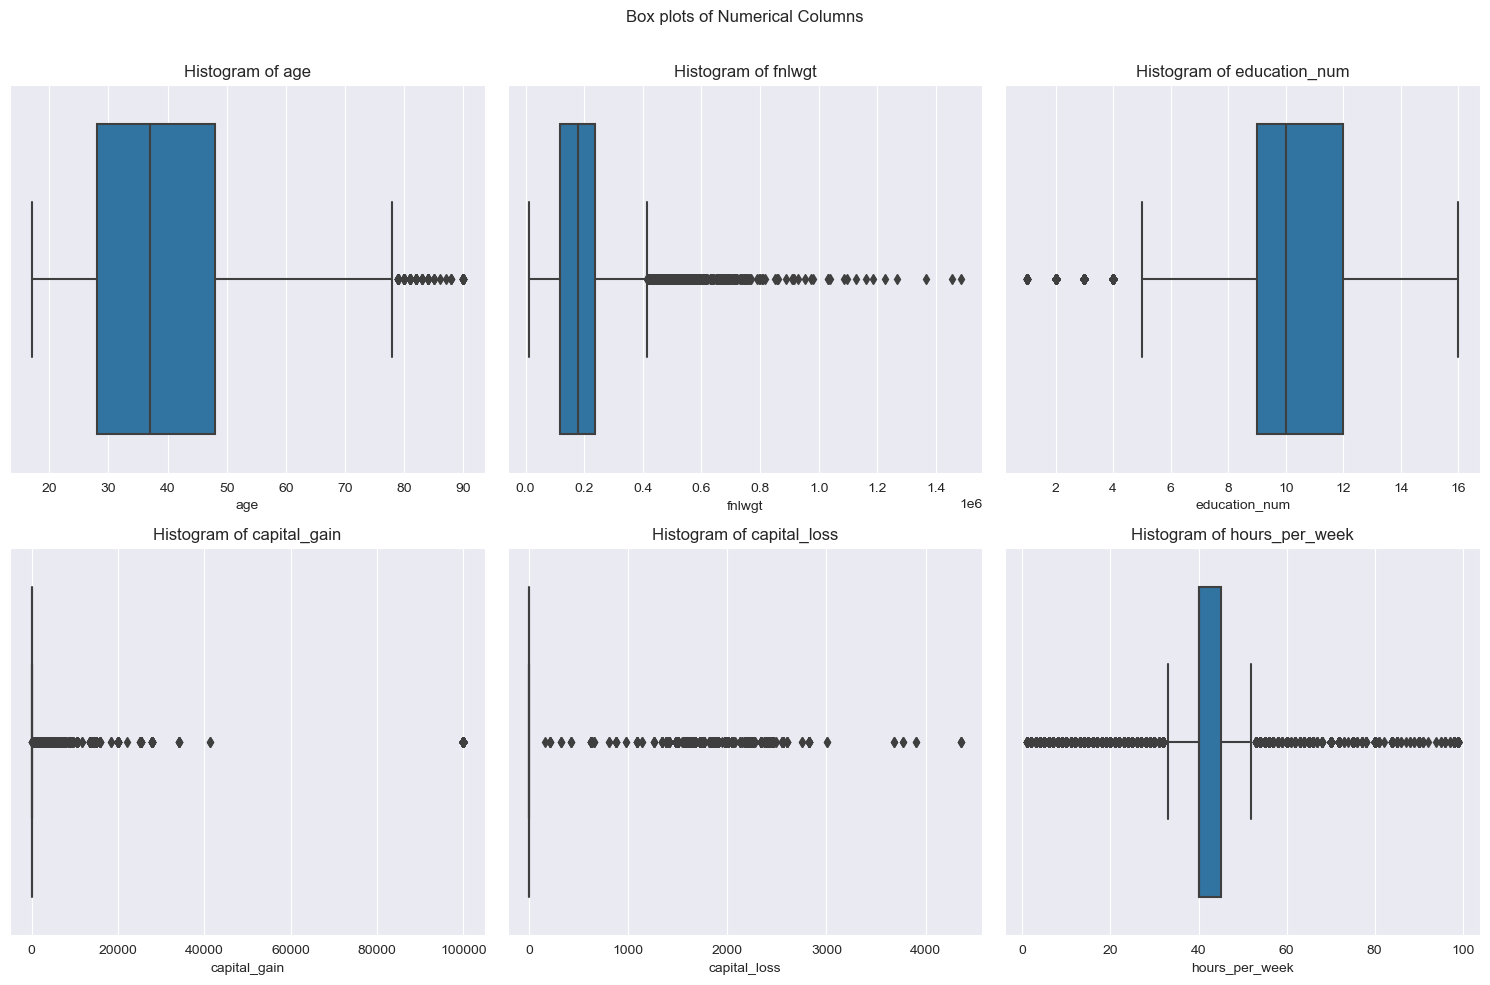

<Axes: >

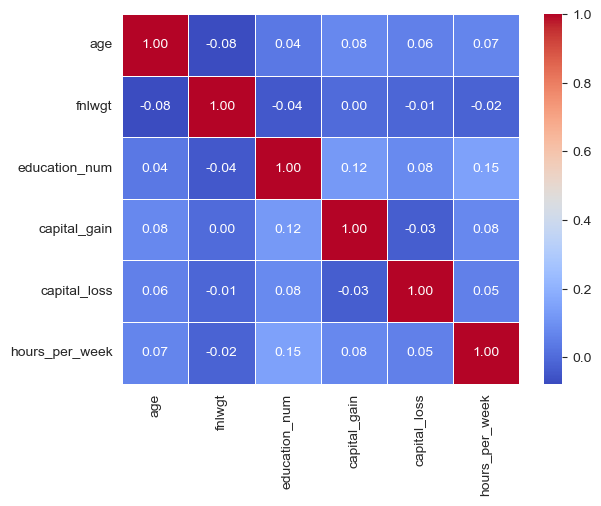

In [20]:
# Since there are no missing values, we can continue with the analysis
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Generate histograms for numerical columns
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
fig.suptitle('Histograms of Numerical Columns')

for i,feature in enumerate(numerical_columns):
    sns.histplot(df[feature],bins=30,ax=axes[i//3,i%3]) #type: ignore
    axes[i//3,i%3].set_title(f'Histogram of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.97]) #type: ignore
plt.show()

# Generate Box plots for numerical columns
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
fig.suptitle('Box plots of Numerical Columns')

for i,feature in enumerate(numerical_columns):
    sns.boxplot(x=df[feature],ax=axes[i//3,i%3])
    axes[i//3,i%3].set_title(f'Histogram of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.97]) #type: ignore
plt.show()

# Generate Correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [21]:
import numpy as np
# Select a skewed numerical feature
skewed_feature = df['fnlwgt']

# Apply log transformation
df['fnlwgt'] = np.log(df['fnlwgt'])

# Justify the choice
print("Log transformation was chosen for the 'Flight_weight' feature because it is skewed to the right.")
print("Log transformation compresses the range of the data and reduces the influence of outliers.")

Log transformation was chosen for the 'Flight_weight' feature because it is skewed to the right.
Log transformation compresses the range of the data and reduces the influence of outliers.


In [22]:
from sklearn.ensemble import IsolationForest

# Creating an instance of the Isolation Forest algorithm
iso = IsolationForest(contamination='auto')

# Fitting the model to the data
iso.fit(numerical_data)

# Predict outliers using the Isolation Forest model
outlier_preds = iso.predict(numerical_data)

# Identify the outlier samples (outliers are marked as -1 by the Isolation Forest)
outlier_index = outlier_preds == -1

# Remove the outlier samples from the data
df_clean = numerical_data[~outlier_index]

# Print the number of outlier samples
print(f"Number of outlier samples: {sum(outlier_index)}")

Number of outlier samples: 3684


In [23]:
# Calculating  the PPS matrix

import ppscore as pps
pps_matrix = pps.matrix(df)

# Print the PPS matrix
display(pps_matrix)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,0.456168,0.471989,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,income,capital_gain,0.000000,regression,True,mean absolute error,1093.884000,1760.682115,DecisionTreeRegressor()
221,income,capital_loss,0.000000,regression,True,mean absolute error,94.942600,176.261353,DecisionTreeRegressor()
222,income,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,8.097596,DecisionTreeRegressor()
223,income,native_country,0.000000,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()


In [24]:
# Compare the PPS matrix with the correlation matrix
corr_matrix = df.corr()
display(corr_matrix)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.060188,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.060188,1.000000,-0.037585,0.003564,-0.005085,-0.024333
education_num,0.036527,-0.037585,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.003564,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.005085,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.024333,0.148123,0.078409,0.054256,1.000000
